In [1]:
pip install psycopg2

Note: you may need to restart the kernel to use updated packages.


# 1. Connecting the data

In [23]:
import pandas as pd
import psycopg2
from psycopg2 import Error

In [25]:
try:
    connection = psycopg2.connect(user="zpy2745",
                                  password="xxx",
                                  host="pg.analytics.northwestern.edu",
                                  port="5432",
                                  database="everything2023")

    cursor = connection.cursor()
    cursor.execute("SELECT version();")
    record = cursor.fetchone()

except (Exception, Error) as error:
    print("Error while connecting to PostgreSQL", error)

In [26]:
strinfo = pd.read_sql("SELECT * FROM group_5.strinfo;", connection);
strinfo

/var/folders/cq/gb8md3g17dx_n11dzhh41nbr0000gp/T/ipykernel_15329/2511957877.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  strinfo = pd.read_sql("SELECT * FROM group_5.strinfo;", connection);


,STORE,CITY,STATE,ZIP
0,2,ST. PETERSBURG,FL,33710
1,3,ST. LOUIS,MO,63126
2,4,LITTLE ROCK,AR,72201
3,7,FORT WORTH,TX,76137
4,9,TEMPE,AZ,85281
...,...,...,...,...
448,9808,GILBERT,AZ,85233
449,9812,METAIRIE,LA,70006
450,9900,LITTLE ROCK,AR,72201
451,9906,LITTLE ROCK,AR,72201


# 2. Find the unique cities and states

In [31]:
unique_cities = strinfo['CITY'].unique()
unique_cities_df = pd.DataFrame({'City': unique_cities})
unique_cities_df

,City
0,ST. PETERSBURG
1,ST. LOUIS
2,LITTLE ROCK
3,FORT WORTH
4,TEMPE
...,...
294,LONGMONT
295,SHAWNEE
296,GREELEY
297,LAWTON


In [32]:
unique_state = strinfo['STATE'].unique()
unique_state_df = pd.DataFrame({'State': unique_state})
unique_state_df

,State
0,FL
1,MO
2,AR
3,TX
4,AZ
5,CO
6,OK
7,NC
8,GA
9,KS


# 3. Visualize States and Cities with the Highest Amount of Stores

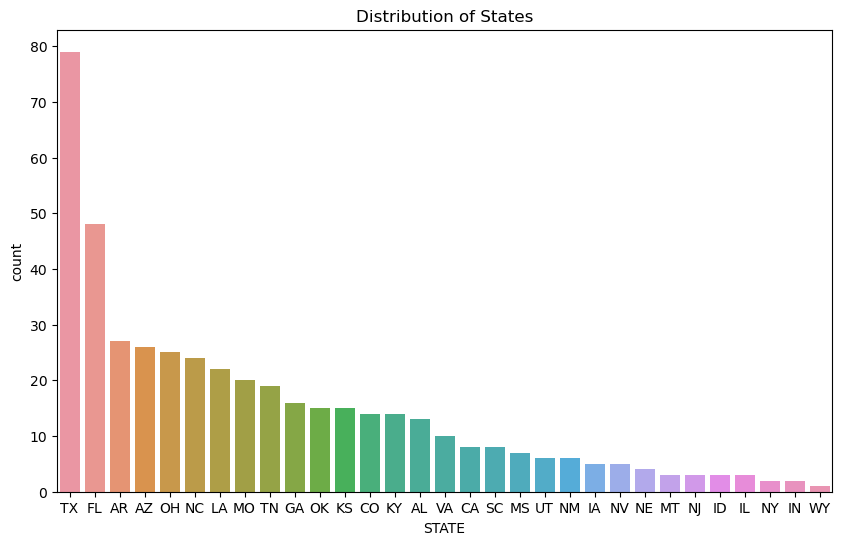

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a countplot to visualize the distribution of states
plt.figure(figsize=(10, 6))
sns.countplot(data=strinfo, x='STATE', order=strinfo['STATE'].value_counts().index)
plt.title("Distribution of States")
plt.show()


Texas, Florida, Arkansas, Arizona, and Ohio are the top 5 states with the most stores located. 

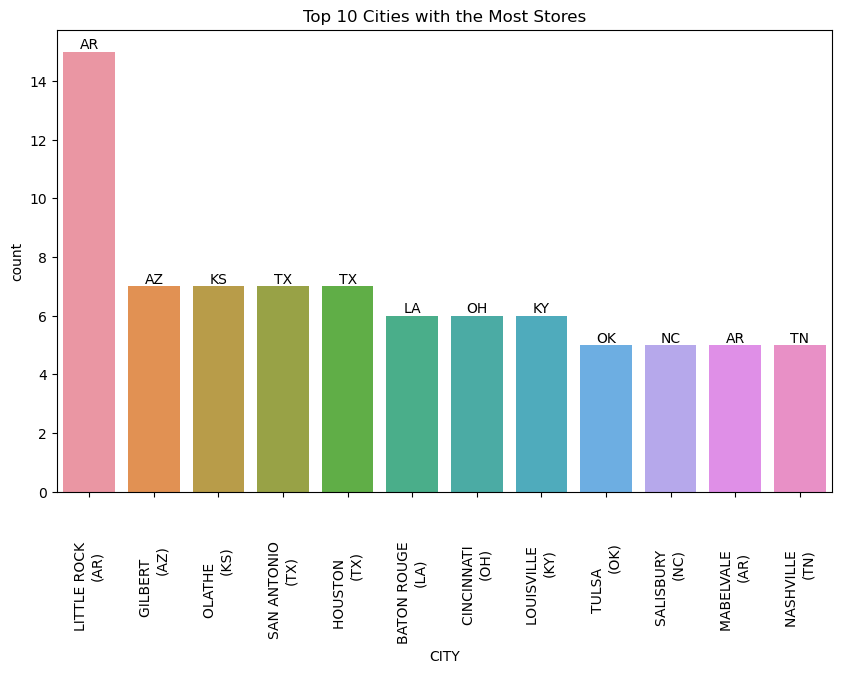

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

top_cities = strinfo['CITY'].value_counts().head(12)

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=strinfo, x='CITY', order=top_cities.index)
plt.title("Top 10 Cities with the Most Stores")

city_state_labels = [f"{city}\n({strinfo[strinfo['CITY'] == city]['STATE'].iloc[0]})" for city in top_cities.index]
ax.set_xticklabels(city_state_labels, rotation=90)  

for i, p in enumerate(ax.patches):
    state = strinfo[strinfo['CITY'] == top_cities.index[i]]['STATE'].iloc[0]
    ax.annotate(state, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


In [ ]:
pip install folium

In [39]:
import pandas as pd
import folium
from IPython.display import IFrame

# Create a DataFrame with the store counts per state
store_counts = strinfo['STATE'].value_counts().reset_index()
store_counts.columns = ['STATE', 'STORE']

# Create a map centered on the U.S.
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)  # Centered in the U.S.

# Define latitude and longitude coordinates for each state
state_coordinates = {
    'FL': (27.7663, -81.6868),
    'MO': (38.5739, -92.6032),
    'AR': (34.7465, -92.2896),
    'TX': (31.9686, -99.9018),
    'AZ': (33.7298, -111.4312),
    'CO': (39.5501, -105.7821),
    'OK': (35.4634, -97.5151),
    'NC': (35.5557, -79.3877),
    'GA': (32.6415, -83.4426),
    'KS': (38.4937, -98.3804),
    'KY': (37.6690, -84.6514),
    'CA': (36.7783, -119.4179),
    'IL': (40.6331, -89.3985),
    'TN': (35.7478, -86.6923),
    'LA': (30.9843, -91.9623),
    'MS': (32.7416, -89.6787),
    'NM': (34.1662, -106.0261),
    'UT': (39.3210, -111.0937),
    'ID': (44.0682, -114.7420),
    'MT': (46.9219, -110.4544),
    'NJ': (40.1907, -74.6728),
    'AL': (32.8067, -86.7911),
    'IA': (42.0115, -93.2105),
    'NE': (41.1254, -98.2681),
    'NV': (38.3135, -117.0554),
    'NY': (42.1657, -74.9481),
    'OH': (40.1907, -82.6698),
    'IN': (39.8494, -86.2583),
    'SC': (33.8569, -80.9450),
    'VA': (37.7693, -78.1697),
    'WY': (43.07597, -107.29028)
}

# Add store counts as markers on the map
for index, row in store_counts.iterrows():
    state = row['STATE']
    count = row['STORE']
    
    # Check if coordinates are available for the state
    if state in state_coordinates:
        lat, lon = state_coordinates[state]
        # Create a marker with a size proportional to the store count
        folium.CircleMarker(
            location=[lat, lon],
            radius=count * 1,  # Adjust the multiplier for an appropriate marker size
            popup=f"{state}: {count} stores",
            fill=False
        ).add_to(m)

# Save the map as an HTML file and display it in the Jupyter Notebook using IFrame
m.save('store_distribution_map.html')
IFrame(src='store_distribution_map.html', width=800, height=600)


In [40]:
from geopy.geocoders import Nominatim

# Create a DataFrame with the store counts per state
store_counts = strinfo['STATE'].value_counts().reset_index()
store_counts.columns = ['STATE', 'STORE']

# Create a map centered on the U.S.
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)  # Centered in the U.S.

# Initialize a geocoder (Nominatim) to obtain coordinates for each state
geolocator = Nominatim(user_agent="store_locator")

# Add store counts as markers on the map
for index, row in store_counts.iterrows():
    state = row['STATE']
    count = row['STORE']

    try:
        location = geolocator.geocode(state)
        if location is not None:
            # Get latitude and longitude coordinates for the state
            lat, lon = location.latitude, location.longitude
            # Create a marker with a size proportional to the store count
            folium.CircleMarker(
                location=[lat, lon],
                radius=count * 1,  # Adjust the multiplier for an appropriate marker size
                popup=f"{state}: {count} stores",
                fill=False
            ).add_to(m)
    except:
        pass

# Save the map as an HTML file and display it in the Jupyter Notebook using IFrame
m.save('store_distribution_map.html')
IFrame(src='store_distribution_map.html', width=800, height=600)


In [ ]:
pip install geopy

In [60]:
# Create a DataFrame with the store counts per city
store_counts = strinfo['CITY'].value_counts().reset_index()
store_counts.columns = ['CITY', 'STORE']

# Create a map centered on the U.S.
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)  # Centered in the U.S.

# Initialize a geocoder (Nominatim) to obtain coordinates for each city
geolocator = Nominatim(user_agent="store_locator")

# Add store counts as markers on the map
for index, row in store_counts.iterrows():
    city = row['CITY']
    count = row['STORE']

    try:
        location = geolocator.geocode(city)
        if location is not None:
            # Get latitude and longitude coordinates for the city
            lat, lon = location.latitude, location.longitude
            # Create a marker with a size proportional to the store count
            folium.CircleMarker(
                location=[lat, lon],
                radius=count * 1,  # Adjust the multiplier for an appropriate marker size
                popup=f"{city}: {count} stores",
                fill=False
            ).add_to(m)
    except:
        pass

# Save the map as an HTML file and display it in the Jupyter Notebook using IFrame
m.save('store_distribution_map.html')
IFrame(src='store_distribution_map.html', width=800, height=600)


In [20]:
# Get the top 10 cities with the most stores
top_cities = strinfo['CITY'].value_counts().head(9).index

# Filter the store_counts DataFrame to include only the top 10 cities
store_counts = store_counts[store_counts['CITY'].isin(top_cities)]

# Create a map centered on the U.S.
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)  # Centered in the U.S.

# Initialize a geocoder (Nominatim) to obtain coordinates for each city
geolocator = Nominatim(user_agent="store_locator")

# Add store counts as markers on the map for the top 10 cities
for index, row in store_counts.iterrows():
    city = row['CITY']
    count = row['STORE']

    try:
        location = geolocator.geocode(city)
        if location is not None:
            # Get latitude and longitude coordinates for the city
            lat, lon = location.latitude, location.longitude
            # Create a marker with a size proportional to the store count
            folium.CircleMarker(
                location=[lat, lon],
                radius=count * 1,  # Adjust the multiplier for an appropriate marker size
                popup=f"{city}: {count} stores",
                fill=False
            ).add_to(m)
    except:
        pass

# Save the map as an HTML file and display it in the Jupyter Notebook using IFrame
m.save('store_distribution_map.html')
IFrame(src='store_distribution_map.html', width=800, height=600)


In [ ]:
print(top_cities)

# 4. Import skstinfo Dataset

In [27]:
skstinfo = pd.read_sql("SELECT * FROM group_5.skstinfo;", connection);
skstinfo

/var/folders/cq/gb8md3g17dx_n11dzhh41nbr0000gp/T/ipykernel_15329/3010254229.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  skstinfo = pd.read_sql("SELECT * FROM group_5.skstinfo;", connection);


,SKU,STORE,COST,RETAIL
0,0,1,2.00,3.00
1,3,102,123.36,440.00
2,3,103,123.36,440.00
3,3,104,123.36,440.00
4,3,202,123.36,440.00
...,...,...,...,...
39230142,9999997,2007,15.00,19.50
39230143,9999997,2707,15.00,9.75
39230144,9999997,3307,15.00,19.50
39230145,9999997,7507,15.00,19.50


In [34]:
# Convert 'STORE' column in skstinfo to int64
skstinfo['STORE'] = skstinfo['STORE'].astype('int64')

# Now, you can merge the two DataFrames
merged_data = pd.merge(strinfo, skstinfo, on='STORE')

In [35]:
merged_data

,STORE,CITY,STATE,ZIP,SKU,COST,RETAIL
0,100,SALISBURY,NC,28146,20149,49.99,170.00
1,100,SALISBURY,NC,28146,58681,13.36,32.00
2,100,SALISBURY,NC,28146,59092,111.56,199.99
3,100,SALISBURY,NC,28146,68681,29.76,54.00
4,100,SALISBURY,NC,28146,71281,68.87,200.00
...,...,...,...,...,...,...,...
39230141,9909,CHEYENNE,WY,82009,9999863,14.00,42.00
39230142,9909,CHEYENNE,WY,82009,9999901,14.50,39.00
39230143,9909,CHEYENNE,WY,82009,9999912,12.36,34.00
39230144,9909,CHEYENNE,WY,82009,9999939,11.66,6.25


# 4. Visualizations on the Merge Dataset

In [41]:
cost_summary = merged_data['COST'].describe()
retail_summary = merged_data['RETAIL'].describe()
print("Cost Summary:")
print(cost_summary)
print("\nRetail Summary:")
print(retail_summary)


Cost Summary:
count    3.923015e+07
mean     2.415759e+01
std      4.056547e+01
min      0.000000e+00
25%      9.000000e+00
50%      1.536000e+01
75%      2.676000e+01
max      2.700000e+03
Name: COST, dtype: float64

Retail Summary:
count    3.923015e+07
mean     4.333249e+01
std      8.392405e+01
min      0.000000e+00
25%      1.299000e+01
50%      2.450000e+01
75%      4.500000e+01
max      6.017000e+03
Name: RETAIL, dtype: float64


Correlation between COST and RETAIL: 0.8955108247061958


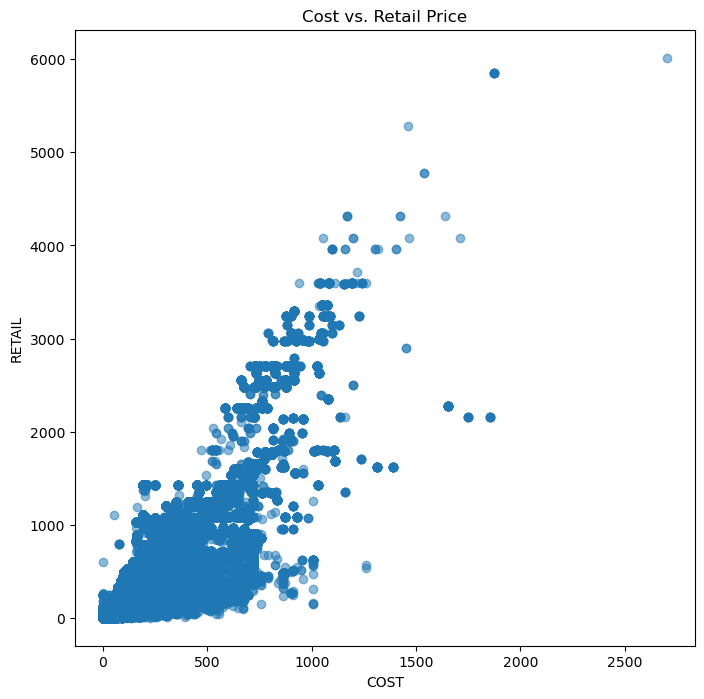

In [47]:
# Correlation between COST and RETAIL
correlation = merged_data['COST'].corr(merged_data['RETAIL'])
print(f"Correlation between COST and RETAIL: {correlation}")

# Scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(merged_data['COST'], merged_data['RETAIL'], alpha=0.5)
plt.title('Cost vs. Retail Price')
plt.xlabel('COST')
plt.ylabel('RETAIL')
plt.show()


In [48]:
state_sum = merged_data.groupby('STATE')[['RETAIL', 'COST']].sum()
state_sum = state_sum.reset_index()
print(state_sum)

   STATE        RETAIL          COST
0     AL  5.880535e+07  3.417623e+07
1     AR  4.480815e+07  2.306575e+07
2     AZ  8.259440e+07  4.546458e+07
3     CA  1.697710e+07  9.164126e+06
4     CO  5.267554e+07  3.209971e+07
5     FL  2.488902e+08  1.472281e+08
6     GA  6.954382e+07  3.932573e+07
7     IA  2.014162e+07  1.136694e+07
8     ID  1.028191e+07  5.618803e+06
9     IL  1.180167e+07  6.439405e+06
10    IN  8.507960e+06  4.728004e+06
11    KS  4.258091e+07  2.572644e+07
12    KY  4.844020e+07  2.648742e+07
13    LA  8.660274e+07  4.787693e+07
14    MO  6.219562e+07  3.581939e+07
15    MS  2.457147e+07  1.333316e+07
16    MT  9.532063e+06  5.879792e+06
17    NC  6.543444e+07  3.632704e+07
18    NE  2.017889e+07  1.245093e+07
19    NM  2.789503e+07  1.506222e+07
20    NV  2.745378e+07  1.513762e+07
21    OH  8.812370e+07  4.701961e+07
22    OK  5.726088e+07  2.961665e+07
23    SC  3.796545e+07  2.052848e+07
24    TN  7.097935e+07  3.814273e+07
25    TX  3.315931e+08  1.781220e+08
2

In [59]:
#Calculate the profit_margin
profit_summary['PROFIT_MARGIN'] = (profit_summary['RETAIL'] - profit_summary['COST']) / profit_summary['RETAIL']
profit_summary = profit_summary.sort_values(by='PROFIT_MARGIN', ascending=False)
profit_summary = profit_summary.reset_index(drop=True)
print(profit_summary)


   STATE        RETAIL          COST        PROFIT  PROFIT_MARGIN
0     AR  4.480815e+07  2.306575e+07  2.174240e+07       0.485233
1     OK  5.726088e+07  2.961665e+07  2.764424e+07       0.482777
2     OH  8.812370e+07  4.701961e+07  4.110409e+07       0.466436
3     TX  3.315931e+08  1.781220e+08  1.534711e+08       0.462829
4     TN  7.097935e+07  3.814273e+07  3.283661e+07       0.462622
5     CA  1.697710e+07  9.164126e+06  7.812975e+06       0.460207
6     NM  2.789503e+07  1.506222e+07  1.283281e+07       0.460039
7     SC  3.796545e+07  2.052848e+07  1.743697e+07       0.459285
8     MS  2.457147e+07  1.333316e+07  1.123831e+07       0.457372
9     UT  2.449129e+07  1.334638e+07  1.114491e+07       0.455056
10    IL  1.180167e+07  6.439405e+06  5.362263e+06       0.454365
11    ID  1.028191e+07  5.618803e+06  4.663105e+06       0.453525
12    KY  4.844020e+07  2.648742e+07  2.195278e+07       0.453193
13    AZ  8.259440e+07  4.546458e+07  3.712983e+07       0.449544
14    NV  